## Question 1

In [1]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval

In [2]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '02087183'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2021-01-01', end='2021-12-31')
df.head()

,00060_Mean,00060_Mean_cd,site_no,00065_Mean,00065_Mean_cd
datetime,,,,,
2021-01-01 00:00:00+00:00,2040.0,A,02087183,3.01,A
2021-01-02 00:00:00+00:00,2040.0,A,02087183,3.01,A
2021-01-03 00:00:00+00:00,2060.0,A,02087183,3.02,A
2021-01-04 00:00:00+00:00,2090.0,A,02087183,3.03,A
2021-01-05 00:00:00+00:00,2890.0,A,02087183,3.33,A


<AxesSubplot:xlabel='datetime'>

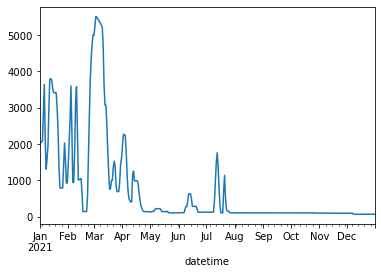

In [3]:
# Simple plot
df['00060_Mean'].plot()

The above figure shows daily discharge, in cubic feet per second, for the year of 2021 at a gage below the dam at Falls Lake in North Carolina.

## Question 2

In [4]:
neuse = nwis.get_record(sites='02091814', service='dv', start='2020-10-01', end='2021-09-30')

In [5]:
int(neuse['00060_Mean'].mean())

7583

Mean daily discharge between 10-01-2020 and 09-30-2021 on the Neuse River in NC

In [6]:
colorado = nwis.get_record(sites='09429490', service='dv', start='2020-10-01', end='2021-09-30')

In [7]:
int(colorado['00060_Mean'].mean())

7643

Mean daily discharge between 10-01-2020 and 09-30-2021 on the Colorado River in CA-AZ

In [8]:
willamette = nwis.get_record(sites='14166000', service='dv', start='2020-10-01', end='2021-09-30')

In [9]:
int(willamette['00060_Mean'].mean())

8429

Mean daily discharge between 10-01-2020 and 09-30-2021 on the Willammette River in OR

<table>
    <tr>
        <th>site name</th>
        <th>site number</th>
        <th>mean daily discharge</th>
    </tr>
    <tr>
        <td>NEUSE RIVER NEAR FORT BARNWELL, NC</td>
        <td>02091814</td>
        <td>7583</td>
    </tr>
    <tr>
        <td>COLORADO RIVER ABOVE IMPERIAL DAM, AZ-CA</td>
        <td>09429490</td>
        <td>7643</td>
    </tr>
    <tr>
        <td>WILLAMETTE RIVER AT HARRISBURG, OR</td>
        <td>14166000</td>
        <td>8429</td>
    </tr>
</table>

## Question 3

In [10]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [11]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')

In [12]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

In [13]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [14]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))

In [15]:
# Get Isolation data as float
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-3])
    isolation.append(iso)
isolation

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

In [16]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup='Isolation: ' + str(isolation[i])).add_to(map)
map

**Extra Credit:** Add name of mountain to map

In [17]:
import re # Regular expression module to format strings 

# Get mountian name without brackets
names = []
for i in range(len(mountain_stats)):
    name = mountain_stats['Mountain peak'].iloc[i]
    name = re.sub("[\(\[].*?[\)\]]", "", name) # remove brackets and characters within
    names.append(name)
names

['Mount Hood',
 'Mount Jefferson',
 'South Sister',
 'North Sister',
 'Middle Sister',
 'Sacajawea Peak',
 'Steens Mountain',
 'Aneroid Mountain',
 'Twin Peaks',
 'Red Mountain',
 'Mount McLoughlin',
 'Elkhorn Peak',
 'Mount Thielsen',
 'Broken Top',
 'Rock Creek Butte',
 'Mount Bachelor',
 'Strawberry Mountain',
 'Mount Scott',
 'Diamond Peak',
 'Pueblo Mountain',
 'Crane Mountain',
 'Drake Peak',
 'Mount Bailey',
 'Gearhart Mountain',
 'Aspen Butte',
 'Yamsay Mountain',
 'Vinegar Hill',
 'Pelican Butte',
 'Lookout Mountain',
 'Warner Peak',
 'Paulina Peak']

In [18]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup='Name: ' + names[i] + ' Isolation: ' + str(isolation[i])).add_to(map)
map

## Question 4

* Write a script to automatically derive the geographic coordinates for the following addresses:

    * 1844 SW Morrison St, Portland, OR 97205
    
    * 800 Occidental Ave S, Seattle, WA 98134
    
    * 1001 Stadium Dr, Inglewood, CA 90301
    
    * 2700 Martin Luther King Jr Blvd, Eugene, OR 97401

In [19]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

In [20]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [21]:
addresses = ['1844 SW Morrison St, Portland, OR 97205', \
             '800 Occidental Ave S, Seattle, WA 98134', \
             '1001 Stadium Dr, Inglewood, CA 90301', \
            '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [22]:
address_coords = []
# Loop through every ski resort to find it's coordinates
for address in addresses:
       
    # Define URL to search in Google Maps
    url = 'https://www.google.com/maps/place/' + address
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    address_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [C:\Users\theoh\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [C:\Users\theoh\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [C:\Users\theoh\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [C:\Users\theoh\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


In [23]:
address_coords

[('45.5216776', '-122.693017'),
 ('47.5933101', '-122.3344609'),
 ('33.9530049', '-118.3407129'),
 ('44.0594287', '-123.0710918')]

In [24]:
map = folium.Map(location=[35, -121], zoom_start=4)
for i in range(0, len(address_coords)):
    folium.Marker(address_coords[i], popup=addresses[i]).add_to(map)
map

## Question 5

In [25]:
# Import package
import xarray as xr

# Define filepath
fp = 'C:/Users/theoh/Downloads/lab7/era_monthly_snowfall_2020.nc'

# Read data
xds = xr.open_dataset(fp, decode_coords='all')

In [26]:
# Find closest cell to Mount Ashland
mount_ashland = xds.sel(latitude=42.081689, longitude=-122.7069373, method='nearest')

In [27]:
# Find closest cell to Willammette Pass 
willammette_pass = xds.sel(latitude=43.6000579, longitude=-122.0387233, method='nearest')

In [28]:
# Find closest cell to Hoodoo
hoodoo = xds.sel(latitude=44.4086477, longitude=-121.8735991, method='nearest')

In [29]:
ash_snow = mount_ashland['sf'].values.sum()
ash_snow = round(ash_snow, 6)
ash_snow

0.009229

In [30]:
wil_snow = willammette_pass['sf'].values.sum()
wil_snow = round(wil_snow, 6)
wil_snow

0.019637

In [31]:
hoo_snow = hoodoo['sf'].values.sum()
hoo_snow = round(hoo_snow, 6)
hoo_snow

0.018597

In [32]:
print(f'Willammette Pass recieved more snowfall in 2020: {wil_snow} m in water equivalent compared to \
{hoo_snow} m in Hoodoo and {ash_snow} m in Mount Ashland')

Willammette Pass recieved more snowfall in 2020: 0.01963699981570244 m in water equivalent compared to 0.01859699934720993 m in Hoodoo and 0.009228999726474285 m in Mount Ashland


**Extra credit part 1:**

In [33]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [C:\Users\theoh\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


In [34]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

In [35]:
ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


In [36]:
ski_resort_coords = \
[('44.9629273', '-118.2357075'),
 ('42.081689', '-122.7069373'),
 ('45.4188609', '-121.6064311'),
 ('45.2816889', '-117.1148251'),
 ('44.4086477', '-121.8735991'),
 ('42.081689', '-122.7069373'),
 ('44.0028975', '-121.6812547'),
 ('45.331759', '-121.6673681'),
 ('45.2943906', '-121.80705'),
 ('45.2871456', '-121.7312248'),
 ('45.7552462', '-118.0536043'),
 ('43.9688848', '-125.7230331'),
 ('45.3233604', '-121.7891084'),
 ('42.237378', '-120.2968217'),
 ('43.6000579', '-122.0387233')]

In [37]:
# Define filepath
fp = 'C:/Users/theoh/Downloads/lab7/era_monthly_snowfall_1979_2020.nc'

# Read data
xds = xr.open_dataset(fp, decode_coords='all')

In [38]:
ski_name_loc = []

for i in range(len(ski_resort_names)):
    name = ski_resort_names[i]
    lat, lon = ski_resort_coords[i]
    ski_name_loc.append((name, (lat, lon)))

ski_name_loc

[('Anthony Lakes (ski area)', ('44.9629273', '-118.2357075')),
 ('Mount Ashland Ski Area', ('42.081689', '-122.7069373')),
 ('Cooper Spur ski area', ('45.4188609', '-121.6064311')),
 ('Ferguson Ridge Ski Area', ('45.2816889', '-117.1148251')),
 ('Hoodoo (ski area)', ('44.4086477', '-121.8735991')),
 ('Mount Ashland Ski Area Expansion', ('42.081689', '-122.7069373')),
 ('Mount Bachelor ski area', ('44.0028975', '-121.6812547')),
 ('Mount Hood Meadows', ('45.331759', '-121.6673681')),
 ('Mount Hood Skibowl', ('45.2943906', '-121.80705')),
 ('Snow Bunny', ('45.2871456', '-121.7312248')),
 ('Spout Springs Ski Area', ('45.7552462', '-118.0536043')),
 ('Summit Pass (Oregon)', ('43.9688848', '-125.7230331')),
 ('Timberline Lodge ski area', ('45.3233604', '-121.7891084')),
 ('Warner Canyon', ('42.237378', '-120.2968217')),
 ('Willamette Pass Resort', ('43.6000579', '-122.0387233'))]

In [39]:
avg_nov_snowfalls = pd.DataFrame()
avg_nov_snowfalls_dict = {}
for ski_area in ski_name_loc:
    november_snowfall = []
    cell = xds.sel(latitude=float(ski_area[1][0]), longitude=float(ski_area[1][1]), method='nearest')
    month_counter = 0
    for month in cell['time']:
        month_str = str(month['time'].values)

        if month_str[5:7] == '11':
            november_snowfall.append(cell['sf'][month_counter].values)
        month_counter += 1
    
    total_nov_snowfall = sum(november_snowfall)
    avg_nov_snowfall = total_nov_snowfall/len(november_snowfall)
    
    avg_nov_snowfalls_dict['name'] = [ski_area[0]]
    avg_nov_snowfalls_dict['avg_nov_snowfall'] = avg_nov_snowfall


    avg_nov_snowfalls= pd.concat([pd.DataFrame(avg_nov_snowfalls_dict), avg_nov_snowfalls], ignore_index = True, axis =0)

avg_nov_snowfalls.sort_values(by=['avg_nov_snowfall'],ascending=False)

,name,avg_nov_snowfall
8,Mount Bachelor ski area,3.258127e-03
0,Willamette Pass Resort,2.860936e-03
10,Hoodoo (ski area),2.510844e-03
11,Ferguson Ridge Ski Area,2.244357e-03
2,Timberline Lodge ski area,2.203378e-03
5,Snow Bunny,2.203378e-03
6,Mount Hood Skibowl,2.203378e-03
7,Mount Hood Meadows,2.203378e-03
14,Anthony Lakes (ski area),1.861593e-03
12,Cooper Spur ski area,1.626202e-03


Mount Bachelor had the highest average snowfall in november for the years 1979 to 2020 with 3.26 x 10^3 m of water equivalent snowfall